# Example: Similarity-centric analogous bars
* This notebook shows an application of the <b>similarity-centric analogous bars method</b> to compare barcodes on the simulation data.

#### Similarity-centric analogous bars
* <b> Inputs </b>:
    * Distance matrix among points in `P`
    * Distance matrix among points in `Q`
    * Corss-system distance matrix among `P` and `Q`.
* <b> Goal </b>:
    Given a selected bar in the Witness barcode `barcode(W(P,Q))`, find its representations in `barcode(VR(P))` and `barcode(VR(Q))`
* <b> Implementation </b>: 
    * Given a selected bar `bar_W_PQ` in `barcode(W(P,Q))`, apply Dowker's Theorem to find the corresponding bar `bar_W_QP` in `barcode(W(Q,P))`. 
    * Apply the bar-to-bars extension method to find the representation of `bar_W_PQ` in `barcode(VR(P))`.
    * Apply the bar-to-bars extension method second time to find the representation of `bar_W_QP` in `barcode(VR(Q))`.
    * All extension methds are implemented component-wise with $\mathbb{F}_2$ coefficients. We assume that all bars of barcodes have unique death times. 

#### Simulation data 
* `V1`: orientation x location conjunctive neurons. (S1 x S1 x S1)
* `O`: orientation neurons (S1)
* `D`: direction neurons (S1)
* The goal is to identify whether the S1's of `O` and `D` are encoded in `V1`

#### Contents 
1. Load points and visualize
2. Plot the four relevant barcodes
3. Run the similarity-centric analogous bars method

In [2]:
using Pkg
Pkg.activate("../../env/.")

  Activating project at `~/analogous_neural/env`


In [3]:
include("../../src/analogous_bars.jl")
include("../../src/Eirene_var.jl")

WebIO._IJuliaInit()

Main.Eirene_var

In [4]:
using .analogous_bars
using .Eirene_var
using DelimitedFiles
using Printf
using HDF5
using Plots
using JLD

# 1. Load distance matrices
* `P`: 300 points sampled from a square torus.
* `Q`: 20 points along one of the S1's of the torus. 

In [5]:
directory = "data"

"data"

In [11]:
# load distance matrices

D_stimulus = readdlm(directory * "/stimulus_perturbed_distance.csv")
D_V1 = h5read(directory * "/V1_simulation_distance.h5","distance")
D_V1 = vector_to_symmetric_matrix(D_V1, 800);

D_V1_stimulus = Array(transpose(h5read(directory * "/V1_stimulus_distance.h5", "distance")));
D_stimulus_V1 = Array(transpose(D_V1_stimulus));

println("number of stimulus points: ", size(D_stimulus,1))
println("number of V1 points: ", size(D_V1, 1))

number of stimulus points: 400
number of V1 points: 800


## Compute VR persistence

In [12]:
dim = 1

# VR persistence
VR_stimulus = eirene(D_stimulus, record = "all", maxdim = dim)
VR_V1 = eirene(D_V1, record = "all", maxdim = dim);

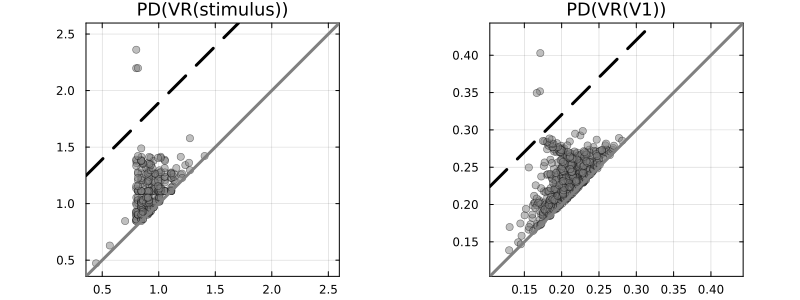

In [13]:
# get all barcodes
barcode_VR_stimulus = barcode(VR_stimulus, dim = 1)
barcode_VR_V1 = barcode(VR_V1, dim = 1)

# plot all persistence diagrams & significance feature cutoff
selected_stimulus, cutoff_stimulus = select_persistent_intervals_IQR(barcode_VR_stimulus)
p1 = plot_PD(barcode_VR_stimulus; 
            cutoff = cutoff_stimulus,  
            title = "PD(VR(stimulus))", 
            titlefontsize = 12)

selected_V1, cutoff_V1 = select_persistent_intervals_IQR(barcode_VR_V1)
p3 = plot_PD(barcode_VR_V1; 
            cutoff = cutoff_V1, 
            title = "PD(VR(V1))", 
            titlefontsize = 12)


plot(p1, p3, layout = grid(1,2), size = (800, 300))

## Compute Witness persistence

In [ ]:
# Witness persistence
W_V1_stimulus = compute_Witness_persistence(D_V1_stimulus, maxdim = dim) # This should take a few hours (4-5?)

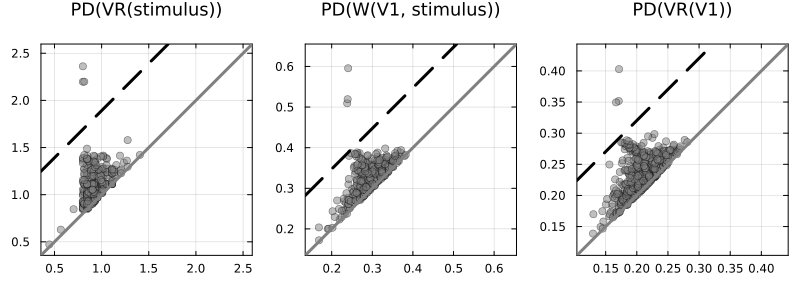

In [60]:
# get all barcodes
barcode_VR_stimulus = barcode(VR_stimulus, dim = 1)
barcode_VR_V1 = barcode(VR_V1, dim = 1)
barcode_W_V1_stimulus = barcode(W_V1_stimulus["eirene_output"], dim = dim)

# plot all persistence diagrams & significance feature cutoff
selected_stimulus, cutoff_stimulus = select_persistent_intervals_IQR(barcode_VR_stimulus)
p1 = plot_PD(barcode_VR_stimulus; 
            cutoff = cutoff_stimulus,  
            title = "PD(VR(stimulus))", 
            titlefontsize = 12)

selected_W_V1_stimulus, cutoff_W_V1_stimulus = select_persistent_intervals_IQR(barcode_W_V1_stimulus)
p2 = plot_PD(barcode_W_V1_stimulus; 
            cutoff = cutoff_W_V1_stimulus, 
            title = "PD(W(V1, stimulus))", 
            titlefontsize = 12)

selected_V1, cutoff_V1 = select_persistent_intervals_IQR(barcode_VR_V1)
p3 = plot_PD(barcode_VR_V1; 
            cutoff = cutoff_V1, 
            title = "PD(VR(V1))", 
            titlefontsize = 12)


plot(p1, p2, p3, layout = grid(1,3), size = (800, 300))

# Similarity-centric analogous bars



In [61]:
analogous_V1, analogous_stimulus, W_QP = analogous_bars.run_baseline_similarity_analogous(VR_P = VR_V1,
                                                                    D_P = D_V1,
                                                                    VR_Q = VR_stimulus,
                                                                    D_Q = D_stimulus,
                                                                    W_PQ = W_V1_stimulus,
                                                                    W_PQ_bars = selected_W_V1_stimulus,
                                                                    dim = 1);

In [62]:
selected_W_V1_stimulus

3-element Vector{Int64}:
 360
 364
 365

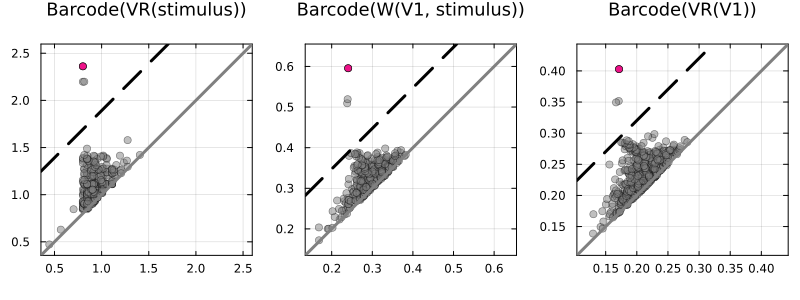

In [63]:
# plot similarity-centric analogous pairs 
# select Witness bar
witness_idx = 360 # choose among 360, 364, 365

# get all barcodesbb
barcode_VR_stimulus = barcode(VR_stimulus, dim = 1)
barcode_VR_V1 = barcode(VR_V1, dim = 1)
barcode_W_V1_stimulus = barcode(W_V1_stimulus["eirene_output"], dim = dim)

# plot all persistence diagrams & significance feature cutoff
selected_stimulus, cutoff_stimulus = select_persistent_intervals_IQR(barcode_VR_stimulus)
p1 = plot_PD(barcode_VR_stimulus; 
            cutoff = cutoff_stimulus,  
            highlight = analogous_stimulus[witness_idx]["baseline_bar_extension"],
            title = "Barcode(VR(stimulus))", 
            titlefontsize = 12)

selected_W_V1_stimulus, cutoff_W_V1_stimulus = select_persistent_intervals_IQR(barcode_W_V1_stimulus)
p2 = plot_PD(barcode_W_V1_stimulus; 
            cutoff = cutoff_W_V1_stimulus, 
            highlight = [witness_idx],
            title = "Barcode(W(V1, stimulus))", 
            titlefontsize = 12)

selected_V1, cutoff_V1 = select_persistent_intervals_IQR(barcode_VR_V1)
p3 = plot_PD(barcode_VR_V1; 
            cutoff = cutoff_V1, 
            highlight = analogous_V1[witness_idx]["baseline_bar_extension"],
            title = "Barcode(VR(V1))", 
            titlefontsize = 12)

plot(p1, p2, p3, layout = grid(1,3), size = (800, 300))

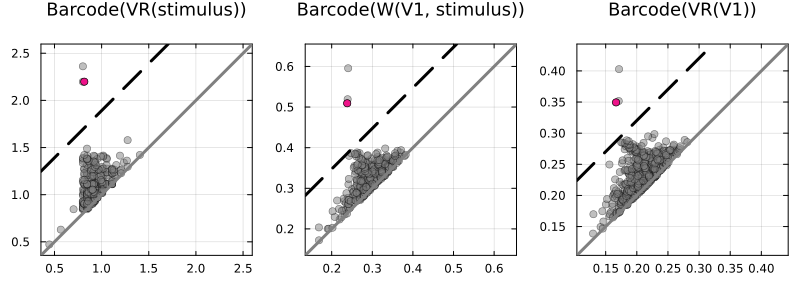

In [64]:
# plot similarity-centric analogous pairs 
# select Witness bar
witness_idx = 364 # choose among 360, 364, 365

# get all barcodes
barcode_VR_stimulus = barcode(VR_stimulus, dim = 1)
barcode_VR_V1 = barcode(VR_V1, dim = 1)
barcode_W_V1_stimulus = barcode(W_V1_stimulus["eirene_output"], dim = dim)

# plot all persistence diagrams & significance feature cutoff
selected_stimulus, cutoff_stimulus = select_persistent_intervals_IQR(barcode_VR_stimulus)
p1 = plot_PD(barcode_VR_stimulus; 
            cutoff = cutoff_stimulus,  
            highlight = analogous_stimulus[witness_idx]["baseline_bar_extension"],
            title = "Barcode(VR(stimulus))", 
            titlefontsize = 12)

selected_W_V1_stimulus, cutoff_W_V1_stimulus = select_persistent_intervals_IQR(barcode_W_V1_stimulus)
p2 = plot_PD(barcode_W_V1_stimulus; 
            cutoff = cutoff_W_V1_stimulus, 
            highlight = [witness_idx],
            title = "Barcode(W(V1, stimulus))", 
            titlefontsize = 12)

selected_V1, cutoff_V1 = select_persistent_intervals_IQR(barcode_VR_V1)
p3 = plot_PD(barcode_VR_V1; 
            cutoff = cutoff_V1, 
            highlight = analogous_V1[witness_idx]["baseline_bar_extension"],
            title = "Barcode(VR(V1))", 
            titlefontsize = 12)

plot(p1, p2, p3, layout = grid(1,3), size = (800, 300))

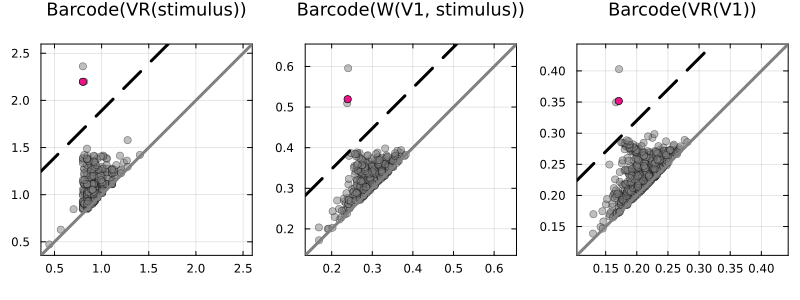

In [65]:
# plot similarity-centric analogous pairs 
# select Witness bar
witness_idx = 365 # choose among 360, 364, 365

# get all barcodes
barcode_VR_stimulus = barcode(VR_stimulus, dim = 1)
barcode_VR_V1 = barcode(VR_V1, dim = 1)
barcode_W_V1_stimulus = barcode(W_V1_stimulus["eirene_output"], dim = dim)

# plot all persistence diagrams & significance feature cutoff
selected_stimulus, cutoff_stimulus = select_persistent_intervals_IQR(barcode_VR_stimulus)
p1 = plot_PD(barcode_VR_stimulus; 
            cutoff = cutoff_stimulus,  
            highlight = analogous_stimulus[witness_idx]["baseline_bar_extension"],
            title = "Barcode(VR(stimulus))", 
            titlefontsize = 12)

selected_W_V1_stimulus, cutoff_W_V1_stimulus = select_persistent_intervals_IQR(barcode_W_V1_stimulus)
p2 = plot_PD(barcode_W_V1_stimulus; 
            cutoff = cutoff_W_V1_stimulus, 
            highlight = [witness_idx],
            title = "Barcode(W(V1, stimulus))", 
            titlefontsize = 12)

selected_V1, cutoff_V1 = select_persistent_intervals_IQR(barcode_VR_V1)
p3 = plot_PD(barcode_VR_V1; 
            cutoff = cutoff_V1, 
            highlight = analogous_V1[witness_idx]["baseline_bar_extension"],
            title = "Barcode(VR(V1))", 
            titlefontsize = 12)

plot(p1, p2, p3, layout = grid(1,3), size = (800, 300))

# Save outputs

In [ ]:
# save Witness persistence information 
#save("data/W_V1_stimulus.jld2", 
#    "eirene_output", W_V1_stimulus["eirene_output"],
#    "index2simplex", W_V1_stimulus["index2simplex"],
#    "W_vertex_to_defualt_vertex", W_V1_stimulus["W_vertex_to_default_vertex"])

In [43]:
# gather barcodes
barcodes = Dict()
barcodes["VR_V1"] = barcode_VR_V1
barcodes["VR_stimulus"] = barcode_VR_stimulus
barcodes["W_V1_stimulus"] = barcode_W_V1_stimulus

# gather the persistence cutoff and selected bars
persistence_cutoff = Dict()
persistence_cutoff["V1_selected"] = selected_V1
persistence_cutoff["V1_cutoff"] = cutoff_V1
persistence_cutoff["stimulus_selected"] = selected_stimulus
persistence_cutoff["stimulus_cutoff"] = cutoff_stimulus
persistence_cutoff["W_V1_stimulus_selected"] = selected_W_V1_stimulus
persistence_cutoff["W_V1_stimulus_cutoff"] = cutoff_W_V1_stimulus;

# gather analogous pairs

analogous_pair = Dict()

for i in selected_W_V1_stimulus

    pair_i = Dict()
    pair_i["order"] = ["V1", "stimulus"]
    pair_i["baseline_bar_ext"] = [analogous_V1[i]["baseline_bar_extension"], analogous_stimulus[i]["baseline_bar_extension"]]
    pair_i["epsilon_0"] = [analogous_V1[i]["epsilon_0"], analogous_stimulus[i]["epsilon_0"]]
    pair_i["min_epsilon_with_boundary"] = [analogous_V1[i]["min_epsilon_with_boundary"], analogous_stimulus[i]["min_epsilon_with_boundary"]]
    analogous_pair[i] = pair_i
end


In [47]:
# save output

#save(directory * "/stimulus_V1_baseline_similarity_analogous.jld2", 
#    "barcodes", barcodes,
#    "persistence_cutoff", persistence_cutoff,
#    "analogous_pair", analogous_pair)

# load
#data = load("data/stimulus_V1_baseline_similarity_analogous.jld2")

In [7]:
data = load("data/stimulus_V1_baseline_similarity_analogous.jld2")

Dict{String, Any} with 3 entries:
  "persistence_cutoff" => Dict{Any, Any}("W_V1_stimulus_selected"=>[360, 364, 3…
  "analogous_pair"     => Dict{Any, Any}(364=>Dict{Any, Any}("epsilon_0"=>[0.16…
  "barcodes"           => Dict{Any, Any}("W_V1_stimulus"=>[0.168753 0.171877; 0…